In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

n = 100
alpha = 0.05
Z = norm.rvs(size=n)

epsilon = np.sqrt( 1/(2*n) * np.log(2/alpha) )
F_n = lambda x: np.sum(Z < x, axis=1) / n
L_n = lambda x: np.maximum(F_n(x) - epsilon, 0)
U_n = lambda x: np.minimum(F_n(x) + epsilon, 1)

sample_size = 1000
X = np.linspace(-2, 2, sample_size)
xx = np.resize(X, (n, sample_size)).T

F = norm.cdf(X)

legends = [
    'CDF',
    'L_n',
    'U_n'
]
font_size = 20

plt.figure(figsize=(20, 16))

plt.plot(X, F, linewidth=2)
plt.plot(X, L_n(xx), linewidth=2)
plt.plot(X, U_n(xx), linewidth=2)

legs = plt.legend(legends, fontsize=0.75*font_size)
for line in legs.get_lines():
    line.set_linewidth(4)

plt.show()

In [ ]:
import numpy as np
from scipy.stats import norm
from tqdm.notebook import tqdm

n = 100
alpha = 0.05

epsilon = np.sqrt( 1/(2*n) * np.log(2/alpha) )

def experiment(i: int) -> bool:
    Z = norm.rvs(size=n, random_state=i)

    F_n = lambda x: np.sum(Z < x, axis=1) / n
    L_n = lambda x: np.maximum(F_n(x) - epsilon, 0)
    U_n = lambda x: np.minimum(F_n(x) + epsilon, 1)

    sample_size = 1000
    X = np.linspace(-2, 2, sample_size)
    xx = np.resize(X, (n, sample_size)).T

    F = norm.cdf(X)

    return np.all(F >= L_n(xx)) and np.all(F <= U_n(xx))

count = sum(experiment(i) for i in tqdm(range(1000)))

print(count)

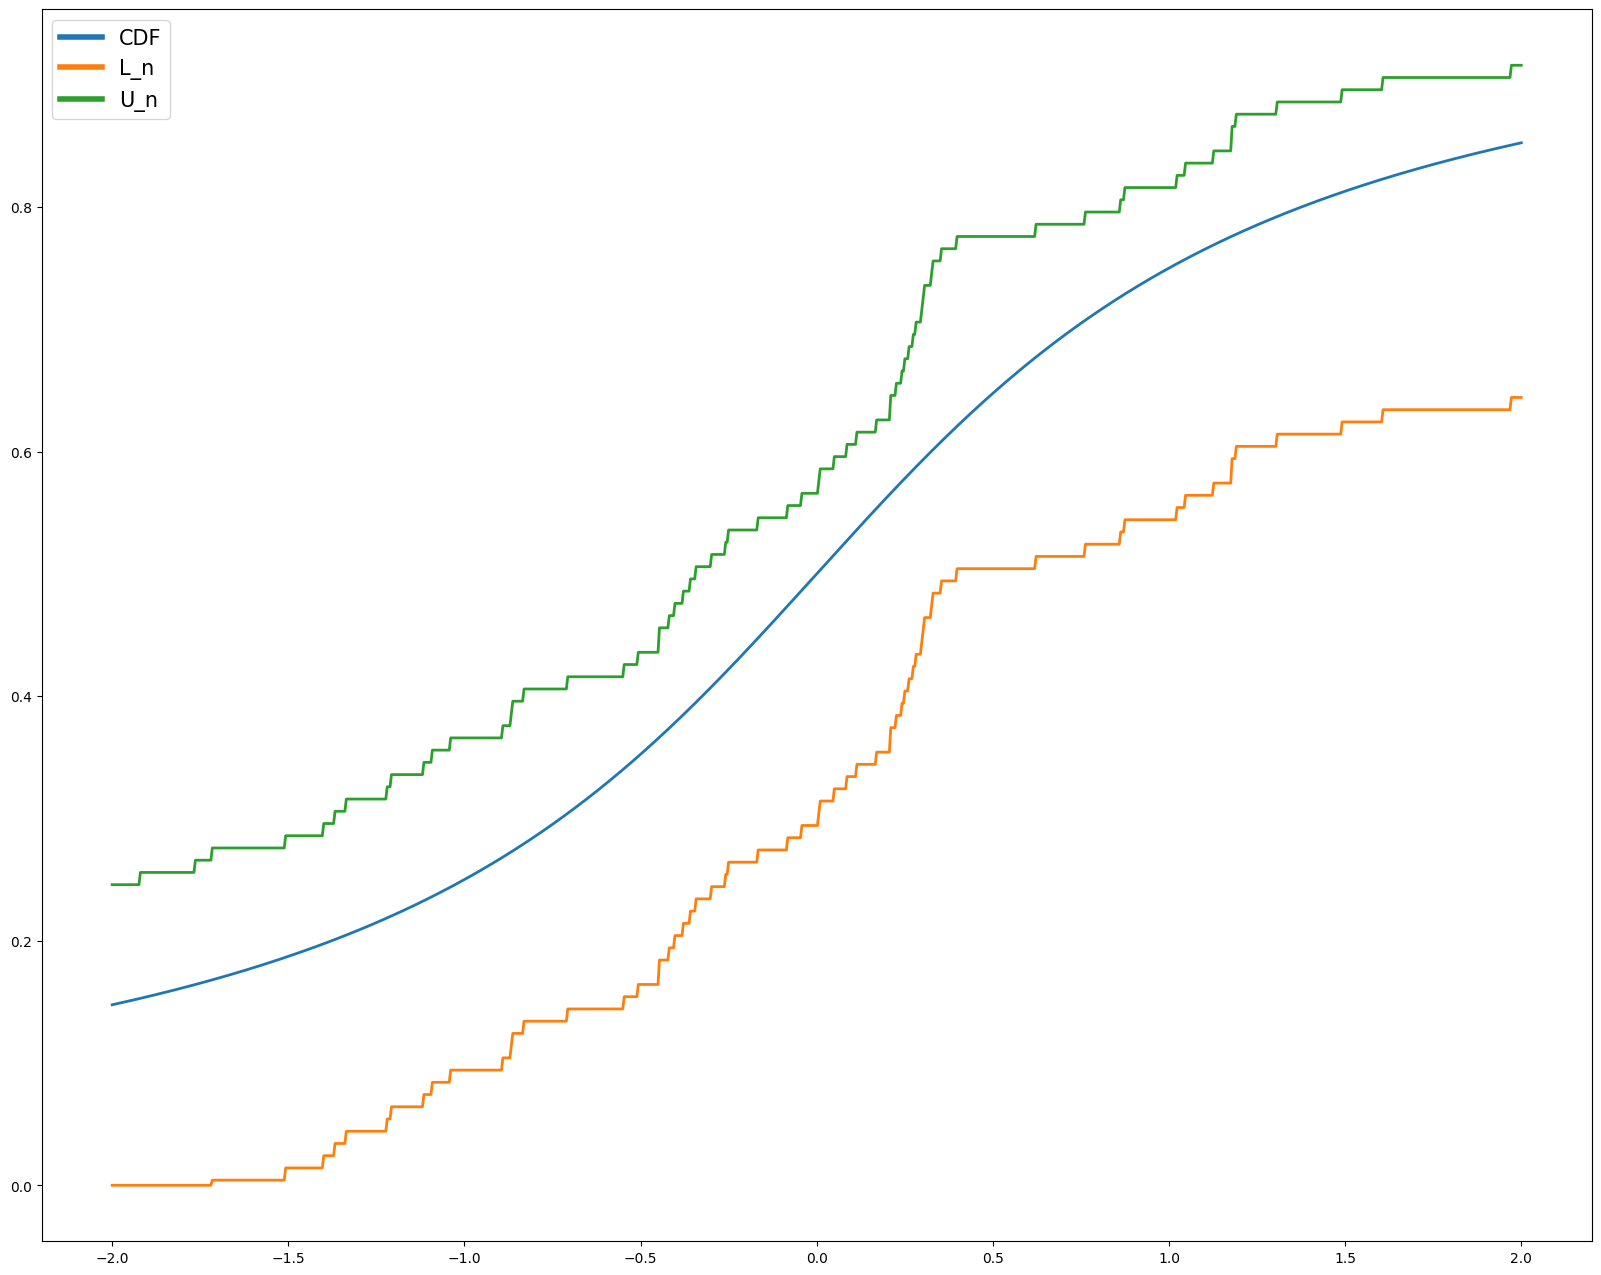

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import cauchy

n = 100
alpha = 0.05
Z = cauchy.rvs(size=n)

epsilon = np.sqrt( 1/(2*n) * np.log(2/alpha) )
F_n = lambda x: np.sum(Z < x, axis=1) / n
L_n = lambda x: np.maximum(F_n(x) - epsilon, 0)
U_n = lambda x: np.minimum(F_n(x) + epsilon, 1)

sample_size = 1000
X = np.linspace(-2, 2, sample_size)
xx = np.resize(X, (n, sample_size)).T

F = cauchy.cdf(X)

legends = [
    'CDF',
    'L_n',
    'U_n'
]
font_size = 20

plt.figure(figsize=(20, 16))

plt.plot(X, F, linewidth=2)
plt.plot(X, L_n(xx), linewidth=2)
plt.plot(X, U_n(xx), linewidth=2)

legs = plt.legend(legends, fontsize=0.75*font_size)
for line in legs.get_lines():
    line.set_linewidth(4)

plt.show()